# Not your grandmother’s toolbox– the Robotics Toolbox reinvented for python
### Peter Corke and Jesse Haviland

This is the code for the examples in the paper published at ICRA2021.


In [125]:
from math import pi
import numpy as np

# display result of assignments
%config ZMQInteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
# make NumPy display a bit nicer
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:10.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})
# make cells nice and wide
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# III.SPATIAL MATHEMATICS

In [76]:
from spatialmath.base import *
T = transl(0.5, 0.0, 0.0) @ rpy2tr(0.1, 0.2, 0.3, order='xyz') @ trotx(-90, 'deg')

array([[  0.9752,  -0.1987, -0.09784,      0.5],
       [  0.1538,   0.2896,   0.9447,        0],
       [ -0.1593,  -0.9363,    0.313,        0],
       [       0,        0,        0,        1]])

In [77]:
from spatialmath import *
T = SE3(0.5, 0.0, 0.0) * SE3.RPY([0.1, 0.2, 0.3], order='xyz') * SE3.Rx(-90, unit='deg')

   0.97517    -0.198669   -0.0978434   0.5          
   0.153792    0.289629    0.944702    0            
  -0.159345   -0.936293    0.312992    0            
   0           0           0           1            


In [78]:
T.eul()

array([   1.674,    1.252,   -1.402])

In [79]:
T.R

array([[  0.9752,  -0.1987, -0.09784],
       [  0.1538,   0.2896,   0.9447],
       [ -0.1593,  -0.9363,    0.313]])

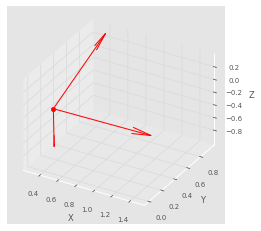

In [80]:
T.plot(color='red', label='2')

In [81]:
UnitQuaternion.Rx(0.3)
UnitQuaternion.AngVec(0.3, [1, 0, 0])

 0.9888 <<  0.1494,  0.0000,  0.0000 >>


In [82]:
R = SE3.Rx(np.linspace(0, pi/2, num=100))
len(R)

100

# IV. ROBOTICS TOOLBOX
## A. Robot models

In [84]:
from roboticstoolbox import *
# robot length values (metres)
d1 = 0.352
a1 = 0.070
a2 = 0.360
d4 = 0.380
d6 = 0.065;

In [85]:
robot = DHRobot([
  RevoluteDH(d=d1, a=a1, alpha=-pi/2), 
  RevoluteDH(a=a2), 
  RevoluteDH(alpha=pi/2),
  ], name="my IRB140")

my IRB140 (by ): 3 axes (RRR), standard DH parameters
┏━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃  dⱼ   ┃  aⱼ  ┃   ⍺ⱼ   ┃
┣━━━━╋━━━━━━━╋━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.352 ┃ 0.07 ┃ -90.0° ┃
┃ q2 ┃   0.0 ┃ 0.36 ┃   0.0° ┃
┃ q3 ┃   0.0 ┃  0.0 ┃  90.0° ┃
┗━━━━┻━━━━━━━┻━━━━━━┻━━━━━━━━┛

In [86]:
puma = models.DH.Puma560()

Puma 560 (by Unimation): 6 axes (RRRRRR), standard DH parameters
┏━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃         dⱼ         ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.6718299999999999 ┃      0 ┃  90.0° ┃ -160.0° ┃ 160.0° ┃
┃ q2 ┃                  0 ┃ 0.4318 ┃   0.0° ┃ -110.0° ┃ 110.0° ┃
┃ q3 ┃            0.15005 ┃ 0.0203 ┃ -90.0° ┃ -135.0° ┃ 135.0° ┃
┃ q4 ┃             0.4318 ┃      0 ┃  90.0° ┃ -266.0° ┃ 266.0° ┃
┃ q5 ┃                  0 ┃      0 ┃ -90.0° ┃ -100.0° ┃ 100.0° ┃
┃ q6 ┃                  0 ┃      0 ┃   0.0° ┃ -266.0° ┃ 266.0° ┃
┗━━━━┻━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0

In [87]:
T = puma.fkine([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

   0.121698   -0.606672   -0.785582    0.247803     
   0.818364    0.509197   -0.266456   -0.12594      
   0.561667   -0.610465    0.558446    1.14629      
   0           0           0           1            


In [88]:
sol = puma.ikine_LM(T)

IKsolution(q=array([     0.1,      0.2,      0.3,      0.4,      0.5,      0.6]), success=True, reason=None, iterations=12, residual=8.515092622288915e-13)

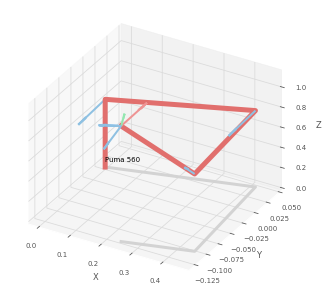

<Figure size 432x288 with 0 Axes>

In [90]:
puma.plot(sol.q, block=False);

In [91]:
puma.ikine_a(T, config="lun")

IKsolution(q=array([   2.101,    1.116,      0.3,   0.9528,   -1.651,   -0.986]), success=True, reason='')

In [92]:
from roboticstoolbox import ETS as ET

In [94]:
# Puma dimensions (m), see RVC2 Fig. 7.4 for details
l1 = 0.672
l2 = -0.2337
l3 = 0.4318
l4 = 0.0203
l5 = 0.0837
l6 = 0.4318;

In [95]:
e = ET.tz(l1) * ET.rz() * ET.ty(l2) * ET.ry() \
    * ET.tz(l3) * ET.tx(l4) * ET.ty(l5) * ET.ry() \
    * ET.tz(l6) * ET.rz() * ET.ry() * ET.rz()

tz(0.672) * Rz(q0) * ty(-0.2337) * Ry(q1) * tz(0.4318) * tx(0.0203) * ty(0.0837) * Ry(q2) * tz(0.4318) * Rz(q3) * Ry(q4) * Rz(q5)

In [96]:
robot = ERobot(e)
print(robot)

noname (by ): 6 axes (RRRRRR), ETS model
┌───┬────────┬────────┬───────┬────────────────────────────────────────────────────────────────────┐
│id │  link  │ parent │ joint │                                ETS                                 │
├───┼────────┼────────┼───────┼────────────────────────────────────────────────────────────────────┤
│ 0 │  link0 │    _O_ │       │ {link0} = {_O_}  * tz(0.672) * Rz(q0)                              │
│ 1 │  link1 │  link0 │  None │ {link1} = {link0}  * ty(-0.2337) * Ry(q1)                          │
│ 2 │  link2 │  link1 │  None │ {link2} = {link1}  * tz(0.4318) * tx(0.0203) * ty(0.0837) * Ry(q2) │
│ 3 │  link3 │  link2 │  None │ {link3} = {link2}  * tz(0.4318) * Rz(q3)                           │
│ 4 │  link4 │  link3 │  None │ {link4} = {link3}  * Ry(q4)                                        │
│ 5 │ @link5 │  link4 │  None │ {link5} = {link4}  * Rz(q5)                                        │
└───┴────────┴────────┴───────┴───────────────────

In [97]:
panda = models.URDF.Panda()
print(panda)

panda (by Franka Emika): 7 axes (RRRRRRR), ETS model
┌───┬──────────────┬─────────────┬──────────────┬──────────────────────────────────────────────────────────────────────────────┐
│id │     link     │   parent    │    joint     │                                     ETS                                      │
├───┼──────────────┼─────────────┼──────────────┼──────────────────────────────────────────────────────────────────────────────┤
│ 0 │  panda_link0 │         _O_ │              │ {panda_link0} = {_O_}                                                        │
│ 1 │  panda_link1 │ panda_link0 │ panda_joint1 │ {panda_link1} = {panda_link0}  * tz(0.333) * Rz(q0)                          │
│ 2 │  panda_link2 │ panda_link1 │ panda_joint2 │ {panda_link2} = {panda_link1}  * Rx(-90°) * Rz(q1)                           │
│ 3 │  panda_link3 │ panda_link2 │ panda_joint3 │ {panda_link3} = {panda_link2}  * ty(-0.316) * Rx(90°) * Rz(q2)               │
│ 4 │  panda_link4 │ panda_link3 │ panda_joi

## B. Trajectories

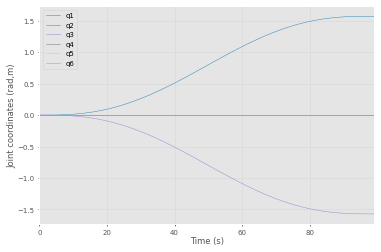

In [99]:
traj = jtraj(puma.qz, puma.qr, 100)
qplot(traj.q)

In [101]:
t = np.arange(0, 2, 0.010)
T0 = SE3(0.6, -0.5, 0.3)

   1           0           0           0.6          
   0           1           0          -0.5          
   0           0           1           0.3          
   0           0           0           1            


In [102]:
T1 = SE3(0.4, 0.5, 0.2)

   1           0           0           0.4          
   0           1           0           0.5          
   0           0           1           0.2          
   0           0           0           1            


In [103]:
Ts = ctraj(T0, T1, t)
len(Ts)

200

In [104]:
sol = puma.ikine_LM(Ts)
sol.q.shape

(200, 6)

## C. Symbolic manipulation

In [105]:
import spatialmath.base.symbolic as sym
phi, theta, psi = sym.symbol('φ, ϴ, ψ')
rpy2r(phi, theta, psi)

array([[cos(ψ)*cos(ϴ), sin(φ)*sin(ϴ)*cos(ψ) - sin(ψ)*cos(φ), sin(φ)*sin(ψ) + sin(ϴ)*cos(φ)*cos(ψ)],
       [sin(ψ)*cos(ϴ), sin(φ)*sin(ψ)*sin(ϴ) + cos(φ)*cos(ψ),
        -sin(φ)*cos(ψ) + sin(ψ)*sin(ϴ)*cos(φ)],
       [-sin(ϴ), sin(φ)*cos(ϴ), cos(φ)*cos(ϴ)]], dtype=object)

In [107]:
q = sym.symbol("q_:6") # q = (q_1, q_2, ... q_5)
T = puma.fkine(q);

In [108]:
puma = models.DH.Puma560(symbolic=True)
T = puma.fkine(q)
T.t[0]

0.15005*sin(q_0) - 0.0203*sin(q_1)*sin(q_2)*cos(q_0) - 0.4318*sin(q_1)*cos(q_0)*cos(q_2) - 0.4318*sin(q_2)*cos(q_0)*cos(q_1) + 0.0203*cos(q_0)*cos(q_1)*cos(q_2) + 0.4318*cos(q_0)*cos(q_1)

In [109]:
puma = models.DH.Puma560(symbolic=False)
J = puma.jacob0(puma.qn)

array([[  0.1501,  0.01435,   0.3197,        0,        0,        0],
       [  0.5963,        0,        0,        0,        0,        0],
       [       0,   0.5963,    0.291,        0,        0,        0],
       [       0,        0,        0,   0.7071,        0,        1],
       [       0,       -1,       -1,        0,       -1,        0],
       [       1,        0,        0,  -0.7071,        0,        0]])

In [110]:
J = puma.jacobe(puma.qn)

array([[       0,  -0.5963,   -0.291,        0,        0,        0],
       [  0.5963,        0,        0,        0,        0,        0],
       [    0.15,  0.01435,   0.3197,        0,        0,        0],
       [      -1,        0,        0,   0.7071,        0,        0],
       [       0,       -1,       -1,        0,       -1,        0],
       [       0,        0,        0,   0.7071,        0,        1]])

## D. Differential kinematics

In [111]:
J = puma.jacob0(puma.qr)

array([[    0.15,  -0.8636,  -0.4318,        0,        0,        0],
       [  0.0203,        0,        0,        0,        0,        0],
       [       0,   0.0203,   0.0203,        0,        0,        0],
       [       0,        0,        0,        0,        0,        0],
       [       0,       -1,       -1,        0,       -1,        0],
       [       1,        0,        0,        1,        0,        1]])

In [112]:
np.linalg.matrix_rank(J)

5

In [113]:
jsingu(J)

joint 5 is dependent on joint 3


In [114]:
H = panda.hessian0(panda.qz)
H.shape

(6, 7, 7)

In [116]:
puma.manipulability(puma.qn)

0.07861716534599998

In [117]:
puma.manipulability(puma.qn, method="asada")

0.0043746137281665

In [118]:
puma.manipulability(puma.qn, axes="trans")

0.11118146146764128

In [119]:
panda.jacobm(panda.qr)

array([[       0],
       [-0.002627],
       [       0],
       [ 0.04064],
       [       0],
       [-0.02734],
       [       0]])

## E. Dynamics

In [126]:
tau = puma.rne(puma.qn, np.zeros((6,)), np.zeros((6,)))

array([       0,      31.64,      6.035,        0,    0.02825,        0])

In [129]:
J = puma.inertia(puma.qn)

array([[     3.659,    -0.4044,     0.1006,  -0.002517,        0,        0],
       [   -0.4044,      4.414,     0.3509,        0,    0.00236,        0],
       [    0.1006,     0.3509,     0.9378,        0,    0.00148,        0],
       [ -0.002517,        0,        0,     0.1925,        0,  2.828e-05],
       [       0,    0.00236,    0.00148,        0,     0.1713,        0],
       [       0,        0,        0,  2.828e-05,        0,     0.1941]])

In [130]:
C = puma.coriolis(puma.qn, 0.1 * np.ones((6,)))

array([[   -0.0267,    -0.1291,    0.01696, -3.344e-05, -0.0002789,      6e-06],
       [   0.06274,    0.03857,    0.07715, -0.0001552,  -1.24e-05, -5.858e-07],
       [  -0.03607,   -0.03867, -9.207e-05, -9.304e-05, -0.0002762, -5.858e-07],
       [ 4.001e-05,  5.718e-05, -4.998e-06,  1.011e-05,  2.425e-05, -4.243e-06],
       [-1.756e-05,   9.62e-05,  0.0001841, -2.425e-05,        0, -5.858e-07],
       [     6e-06,  3.414e-06,  3.414e-06,  1.414e-06,  5.858e-07,        0]])

In [131]:
g = puma.gravload(puma.qn)

array([       0,      31.64,      6.035,        0,    0.02825,        0])

In [132]:
qdd = puma.accel(puma.qn, tau, np.zeros((6,)))

array([     147.6,     -133.7,      406.4,     -2.494,     -8.281,  0.0003634])

# V. NEW CAPABILITY
## B. Collision checking

In [133]:
obstacle = Box([1, 1, 1], SE3(1, 0, 0)) 
iscollision = panda.collided(obstacle) # boolean
iscollision = panda.links[0].collided(obstacle)

False

In [134]:
d, p1, p2 = panda.closest_point(obstacle)
print(d, p1, p2)
d, p1, p2 = panda.links[0].closest_point(obstacle)
print(d, p1, p2)

0.4276    1           0           0           0.0724       
   0           1           0           0.0424       
   0           0           1          -0.02         
   0           0           0           1            
    1           0           0           0.5          
   0           1           0           0.0424       
   0           0           1          -0.02         
   0           0           0           1            

0.5    1           0           0           0            
   0           1           0           0            
   0           0           1           0.06         
   0           0           0           1            
    1           0           0           0.5          
   0           1           0           0            
   0           0           1           0.06         
   0           0           0           1            



## C. Interfaces

In [135]:
panda.plot(panda.qr, block=False);

In [ ]:
from roboticstoolbox.backends.Swift import Swift
backend = Swift()
backend.launch()   # create graphical world
backend.add(panda) # add robot to the world
panda.q = panda.qr        # update the robot
backend.step()    # display the world